### GNOM Testing with Classical ML - Linear Regression

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#### 200 Epochs, Learning Rate = 0.01

In [3]:
GD_file_path = "wine/GD/lr-0.01/200/no_batching/2024-09-20-14:36:32/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [4]:
GNOM_file_path = "wine/GNOM/lr-0.01/200/no_batching/2024-09-20-14:35:46/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [5]:
# SGD with batch size = 1
SGD_1_file = "wine/GD/lr-0.01/200/1/2024-09-20-14:50:48/results.csv"
SGD_1 = pd.read_csv(SGD_1_file)

In [6]:
# SGD with batch size = 32
SGD_32_file = "wine/GD/lr-0.01/200/32/2024-09-20-14:40:37/results.csv"
SGD_32 = pd.read_csv(SGD_32_file)

In [7]:
# SGD with batch size = 128
SGD_128_file = "wine/GD/lr-0.01/200/128/2024-09-20-14:40:13/results.csv"
SGD_128 = pd.read_csv(SGD_128_file)

In [8]:
# SGD with batch size = 512
SGD_512_file = "wine/GD/lr-0.01/200/512/2024-09-20-14:39:58/results.csv"
SGD_512 = pd.read_csv(SGD_512_file)

#### 200 Epochs, Learning Rate = 0.1

In [44]:
GD_file_path = "wine/GD/lr-0.01/200/2024-09-18-16:15:08/results.csv"

GD_stats = pd.read_csv(GD_file_path)

In [45]:
GNOM_file_path = "wine/GNOM/lr-0.01/200/2024-09-18-16:18:09/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

In [ ]:
GNOM_stats.head()

,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm
0,1,31.725208,11.211828,0.198831,29.585192,34.007914
1,2,29.207855,10.721018,0.030757,27.333145,32.136962
2,3,26.931625,10.272343,0.025895,25.264517,30.627947
3,4,24.853575,9.852093,0.027441,23.358603,29.307184
4,5,22.947563,9.453639,0.085119,21.600653,28.095872


#### 500 Epochs, Learning Rate = 0.01

In [42]:
GD_file_path = "wine/GD/lr-0.01/500/2024-09-18-16:34:38/results.csv"
GD_stats = pd.read_csv(GD_file_path)

In [43]:
GNOM_file_path = "wine/GNOM/lr-0.01/500/2024-09-18-16:33:30/results.csv"
GNOM_stats = pd.read_csv(GNOM_file_path)

### Plots

#### GD vs. GNOM

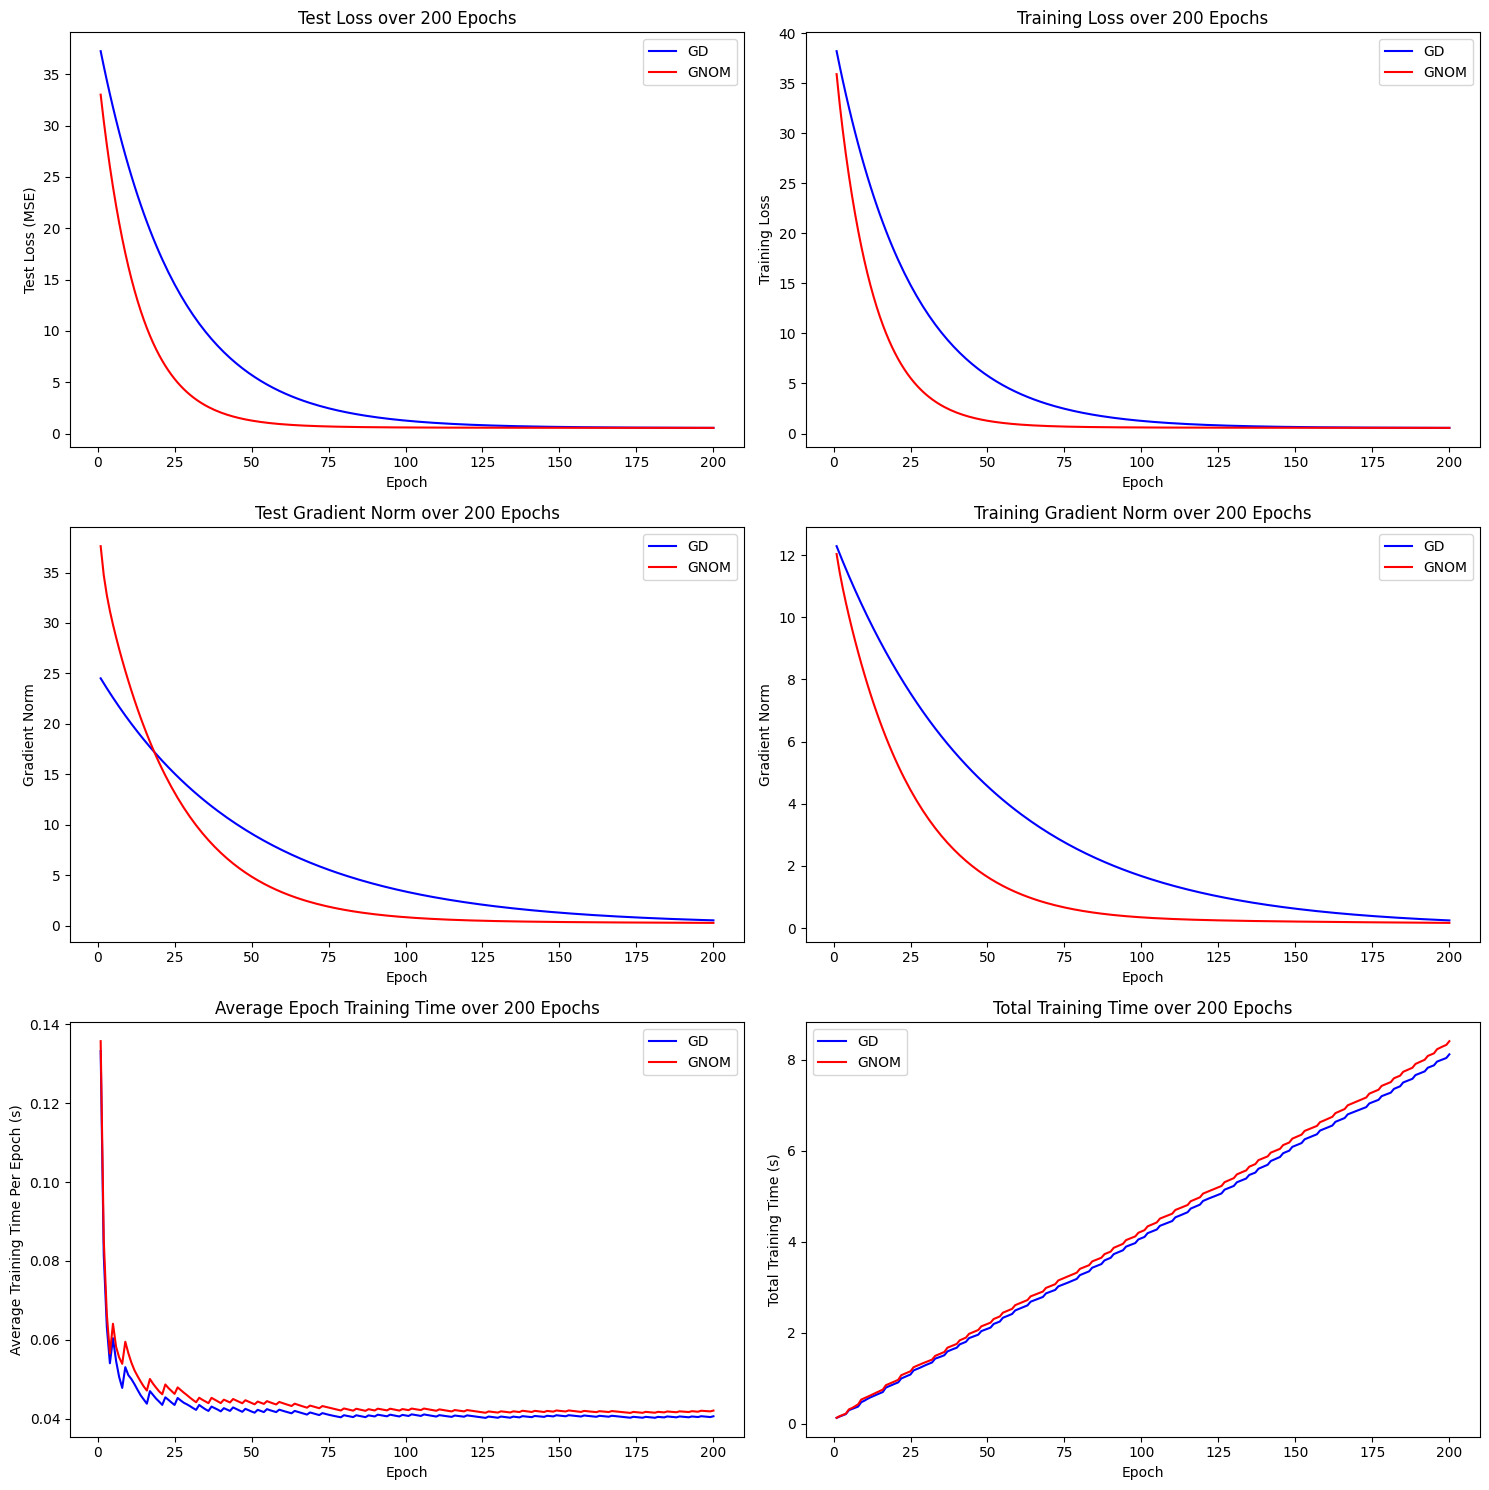

In [9]:
# Extract data from DataFrames
epochs = GD_stats['Epoch']
num_epochs = len(epochs)

GD_test_loss = GD_stats['Test Loss']
GNOM_test_loss = GNOM_stats['Test Loss']

GD_training_loss = GD_stats['Training Loss']
GNOM_training_loss = GNOM_stats['Training Loss']

GD_train_norm = GD_stats['Training Gradient Norm']
GNOM_train_norm = GNOM_stats['Training Gradient Norm']

GD_test_norm = GD_stats['Test Gradient Norm']
GNOM_test_norm = GNOM_stats['Test Gradient Norm']

# Calculate average training time (expanding mean)
GD_avg_training_time = GD_stats['Training Time (s)'].expanding().mean()
GNOM_avg_training_time = GNOM_stats['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding mean)
GD_total_training_time = GD_stats['Training Time (s)'].expanding().sum()
GNOM_total_training_time = GNOM_stats['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 5: Average Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### GD vs. GNOM vs. SGD with batch E {1, 32, 128, 512}

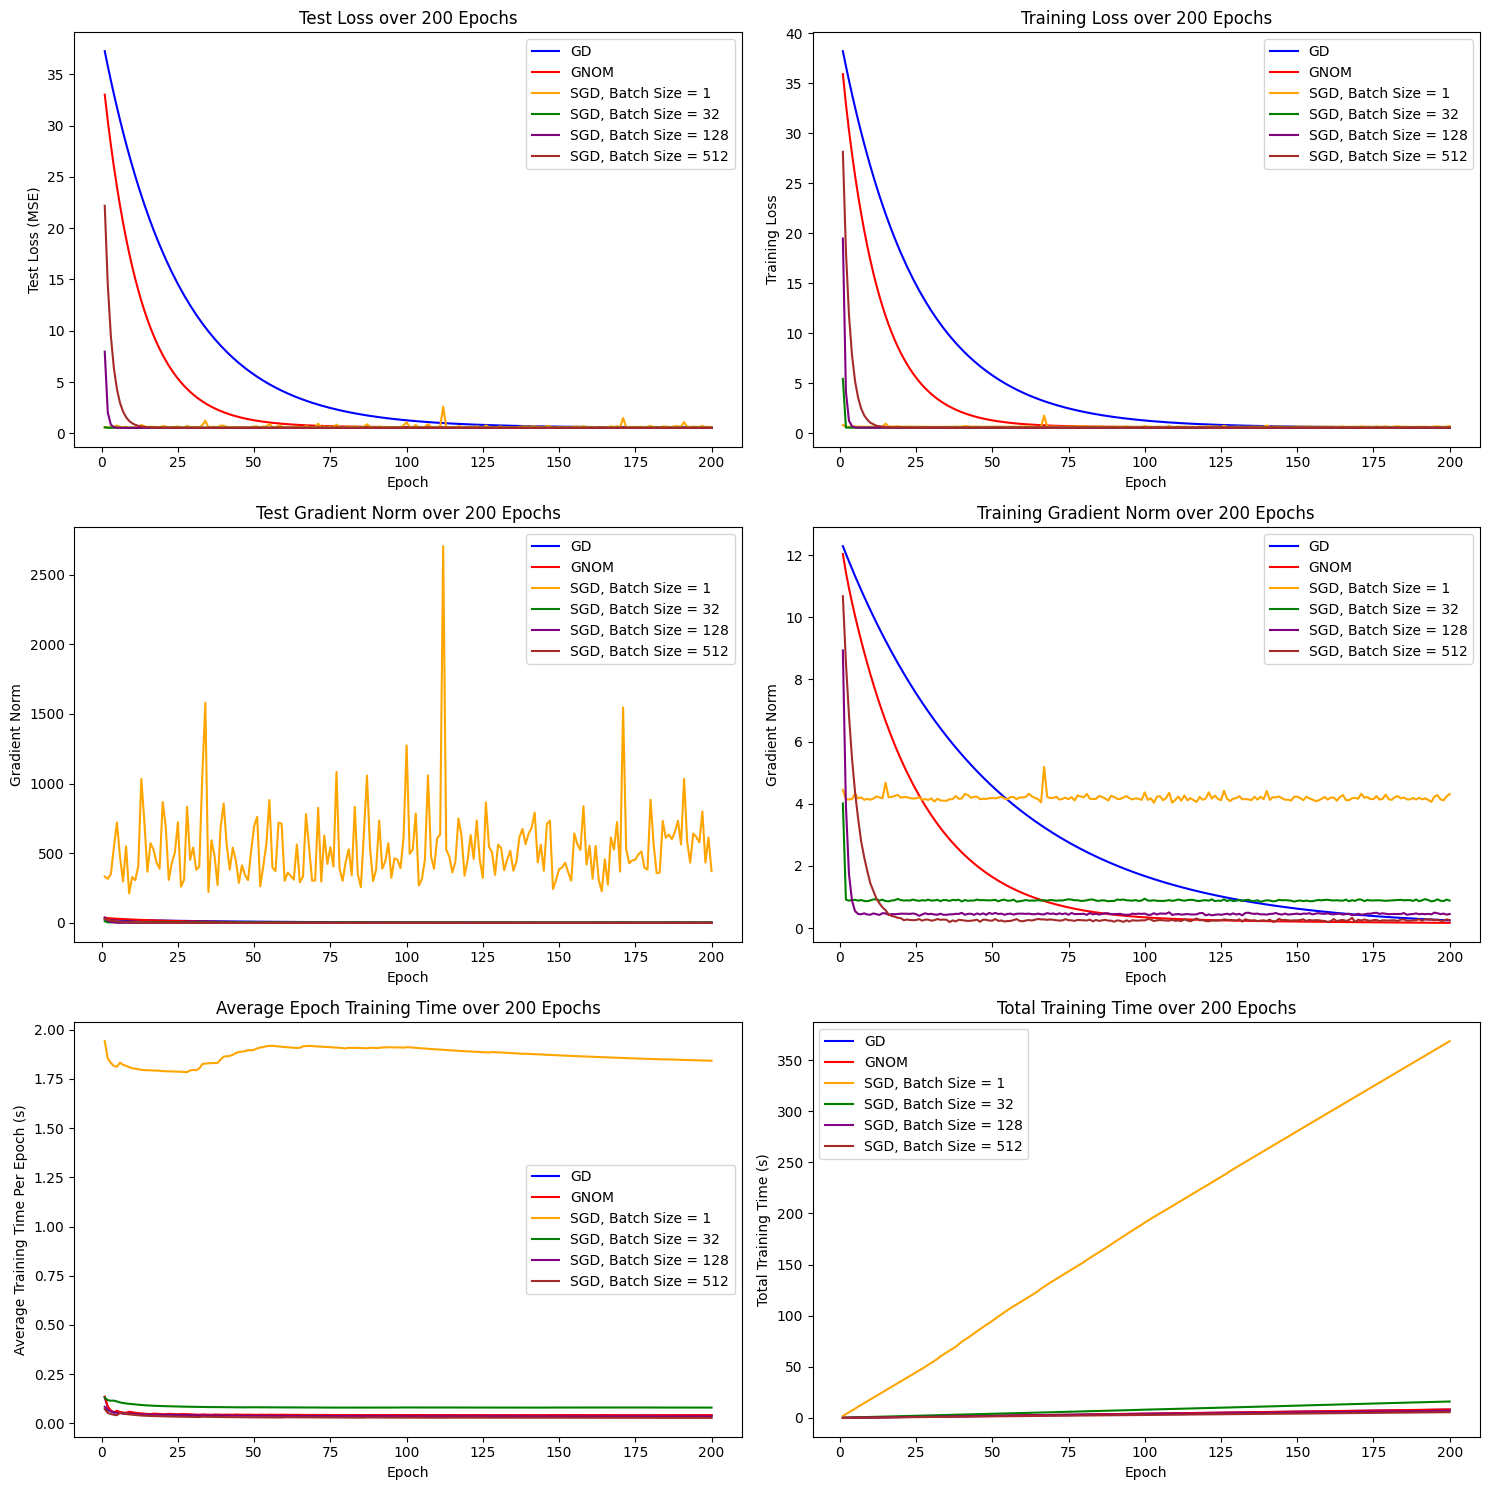

In [11]:
# Extract data for various SGD batch sizes
SGD_1_test_loss = SGD_1['Test Loss']
SGD_32_test_loss = SGD_32['Test Loss']
SGD_128_test_loss = SGD_128['Test Loss']
SGD_512_test_loss = SGD_512['Test Loss']

SGD_1_training_loss = SGD_1['Training Loss']
SGD_32_training_loss = SGD_32['Training Loss']
SGD_128_training_loss = SGD_128['Training Loss']
SGD_512_training_loss = SGD_512['Training Loss']

SGD_1_train_norm = SGD_1['Training Gradient Norm']
SGD_32_train_norm = SGD_32['Training Gradient Norm']
SGD_128_train_norm = SGD_128['Training Gradient Norm']
SGD_512_train_norm = SGD_512['Training Gradient Norm']

SGD_1_test_norm = SGD_1['Test Gradient Norm']
SGD_32_test_norm = SGD_32['Test Gradient Norm']
SGD_128_test_norm = SGD_128['Test Gradient Norm']
SGD_512_test_norm = SGD_512['Test Gradient Norm']

# Calculate average training time (expanding mean) for SGD variants
SGD_1_avg_training_time = SGD_1['Training Time (s)'].expanding().mean()
SGD_32_avg_training_time = SGD_32['Training Time (s)'].expanding().mean()
SGD_128_avg_training_time = SGD_128['Training Time (s)'].expanding().mean()
SGD_512_avg_training_time = SGD_512['Training Time (s)'].expanding().mean()

# Calculate total training time (expanding sum) for SGD variants
SGD_1_total_training_time = SGD_1['Training Time (s)'].expanding().sum()
SGD_32_total_training_time = SGD_32['Training Time (s)'].expanding().sum()
SGD_128_total_training_time = SGD_128['Training Time (s)'].expanding().sum()
SGD_512_total_training_time = SGD_512['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(epochs, SGD_1_test_loss, label='SGD, Batch Size = 1', color='orange')
axes[0, 0].plot(epochs, SGD_32_test_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, SGD_512_test_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(epochs, SGD_1_training_loss, label='SGD, Batch Size = 1', color='orange')
axes[0, 1].plot(epochs, SGD_32_training_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, SGD_512_training_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(epochs, SGD_1_train_norm, label='SGD, Batch Size = 1', color='orange')
axes[1, 1].plot(epochs, SGD_32_train_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, SGD_512_train_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(epochs, SGD_1_test_norm, label='SGD, Batch Size = 1', color='orange')
axes[1, 0].plot(epochs, SGD_32_test_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, SGD_512_test_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(epochs, SGD_1_avg_training_time, label='SGD, Batch Size = 1', color='orange')
axes[2, 0].plot(epochs, SGD_32_avg_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, SGD_128_avg_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, SGD_512_avg_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(epochs, SGD_1_total_training_time, label='SGD, Batch Size = 1', color='orange')
axes[2, 1].plot(epochs, SGD_32_total_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, SGD_128_total_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, SGD_512_total_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs. GD vs. SGD (No batch = 1)

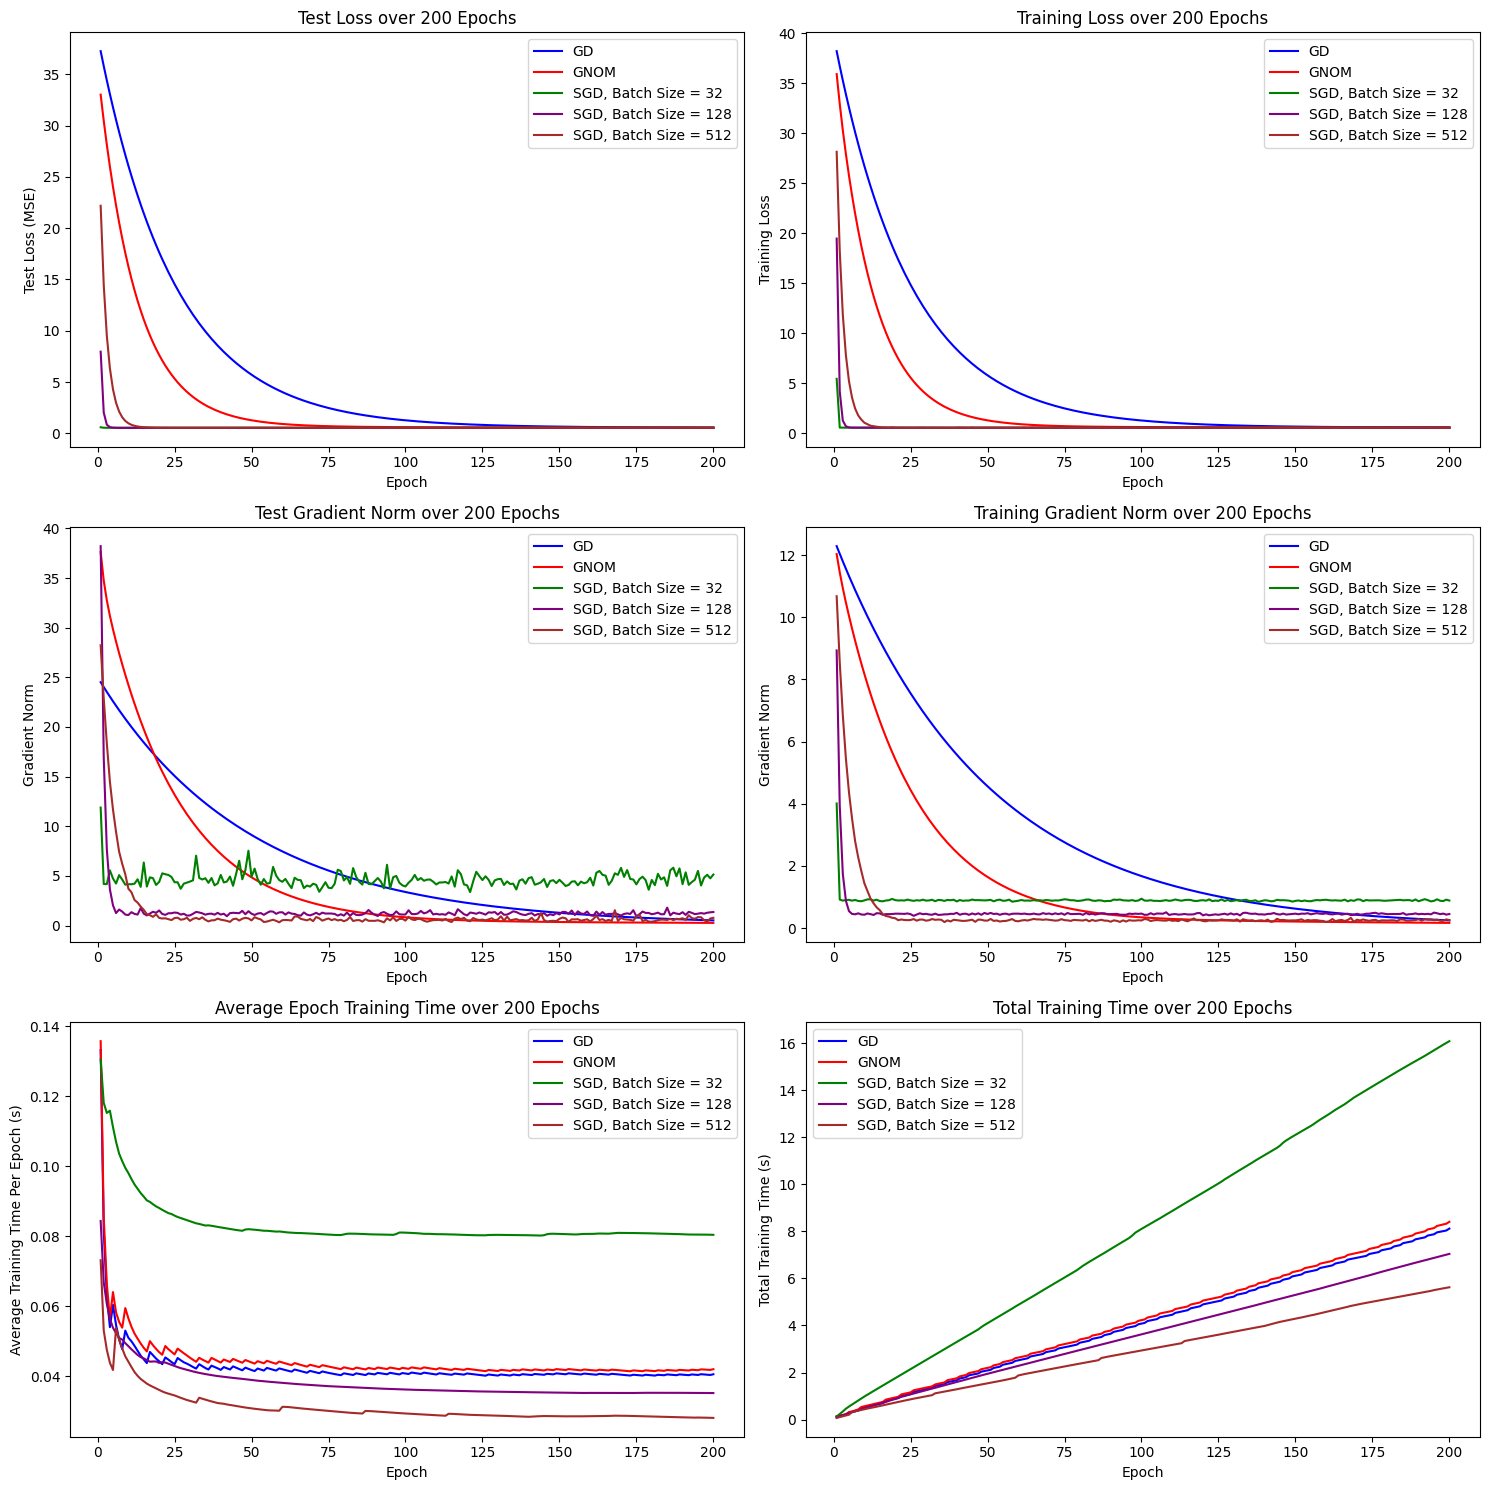

In [12]:
# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(epochs, SGD_32_test_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 0].plot(epochs, SGD_128_test_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 0].plot(epochs, SGD_512_test_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Epochs')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(epochs, SGD_32_training_loss, label='SGD, Batch Size = 32', color='green')
axes[0, 1].plot(epochs, SGD_128_training_loss, label='SGD, Batch Size = 128', color='purple')
axes[0, 1].plot(epochs, SGD_512_training_loss, label='SGD, Batch Size = 512', color='brown')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Epochs')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(epochs, SGD_32_train_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 1].plot(epochs, SGD_128_train_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 1].plot(epochs, SGD_512_train_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Epochs')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(epochs, SGD_32_test_norm, label='SGD, Batch Size = 32', color='green')
axes[1, 0].plot(epochs, SGD_128_test_norm, label='SGD, Batch Size = 128', color='purple')
axes[1, 0].plot(epochs, SGD_512_test_norm, label='SGD, Batch Size = 512', color='brown')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Epochs')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(epochs, SGD_32_avg_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 0].plot(epochs, SGD_128_avg_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 0].plot(epochs, SGD_512_avg_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Average Training Time Per Epoch (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Epochs')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(epochs, SGD_32_total_training_time, label='SGD, Batch Size = 32', color='green')
axes[2, 1].plot(epochs, SGD_128_total_training_time, label='SGD, Batch Size = 128', color='purple')
axes[2, 1].plot(epochs, SGD_512_total_training_time, label='SGD, Batch Size = 512', color='brown')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Epochs')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs. GD vs. SGD Batch 512 Normalized

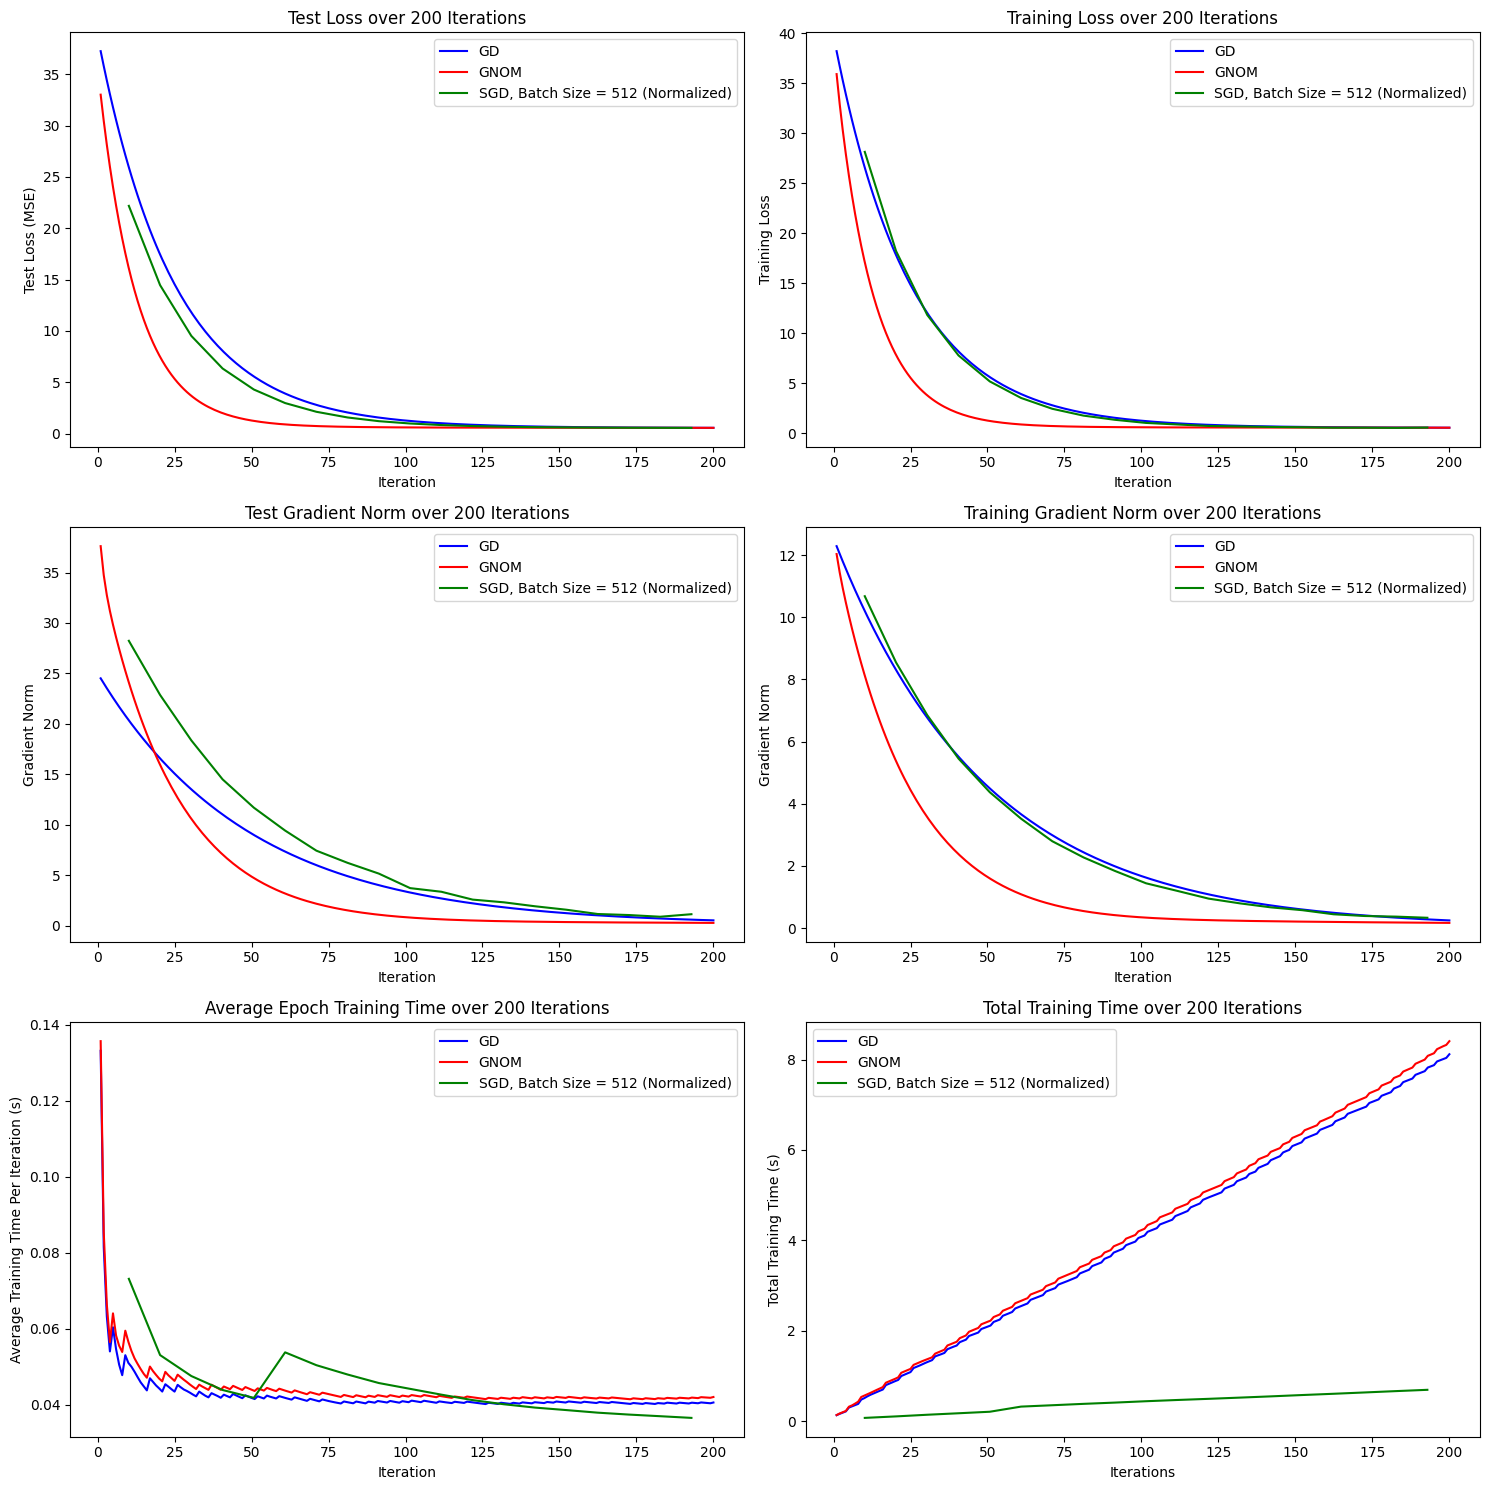

In [16]:
ratio = 5197 / 512
SGD_512_normalized = SGD_512.copy()  # Copy the original DataFrame
SGD_512_normalized['Epoch'] = SGD_512_normalized['Epoch'] * ratio
SGD_512_normalized = SGD_512_normalized[SGD_512_normalized['Epoch'] <= 200]


SGD_512_normalized_test_loss = SGD_512_normalized['Test Loss']
SGD_512_normalized_training_loss = SGD_512_normalized['Training Loss']
SGD_512_normalized_train_norm = SGD_512_normalized['Training Gradient Norm']
SGD_512_normalized_test_norm = SGD_512_normalized['Test Gradient Norm']
SGD_512_normalized_avg_training_time = SGD_512_normalized['Training Time (s)'].expanding().mean()
SGD_512_normalized_total_training_time = SGD_512_normalized['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Iterations')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_training_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Iterations')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_train_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Iterations')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Iterations')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_avg_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 0].set_xlabel('Iteration')
axes[2, 0].set_ylabel('Average Training Time Per Iteration (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Iterations')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_total_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 1].set_xlabel('Iterations')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Iterations')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### GNOM vs GD vs SGD Normalized (512, 128)

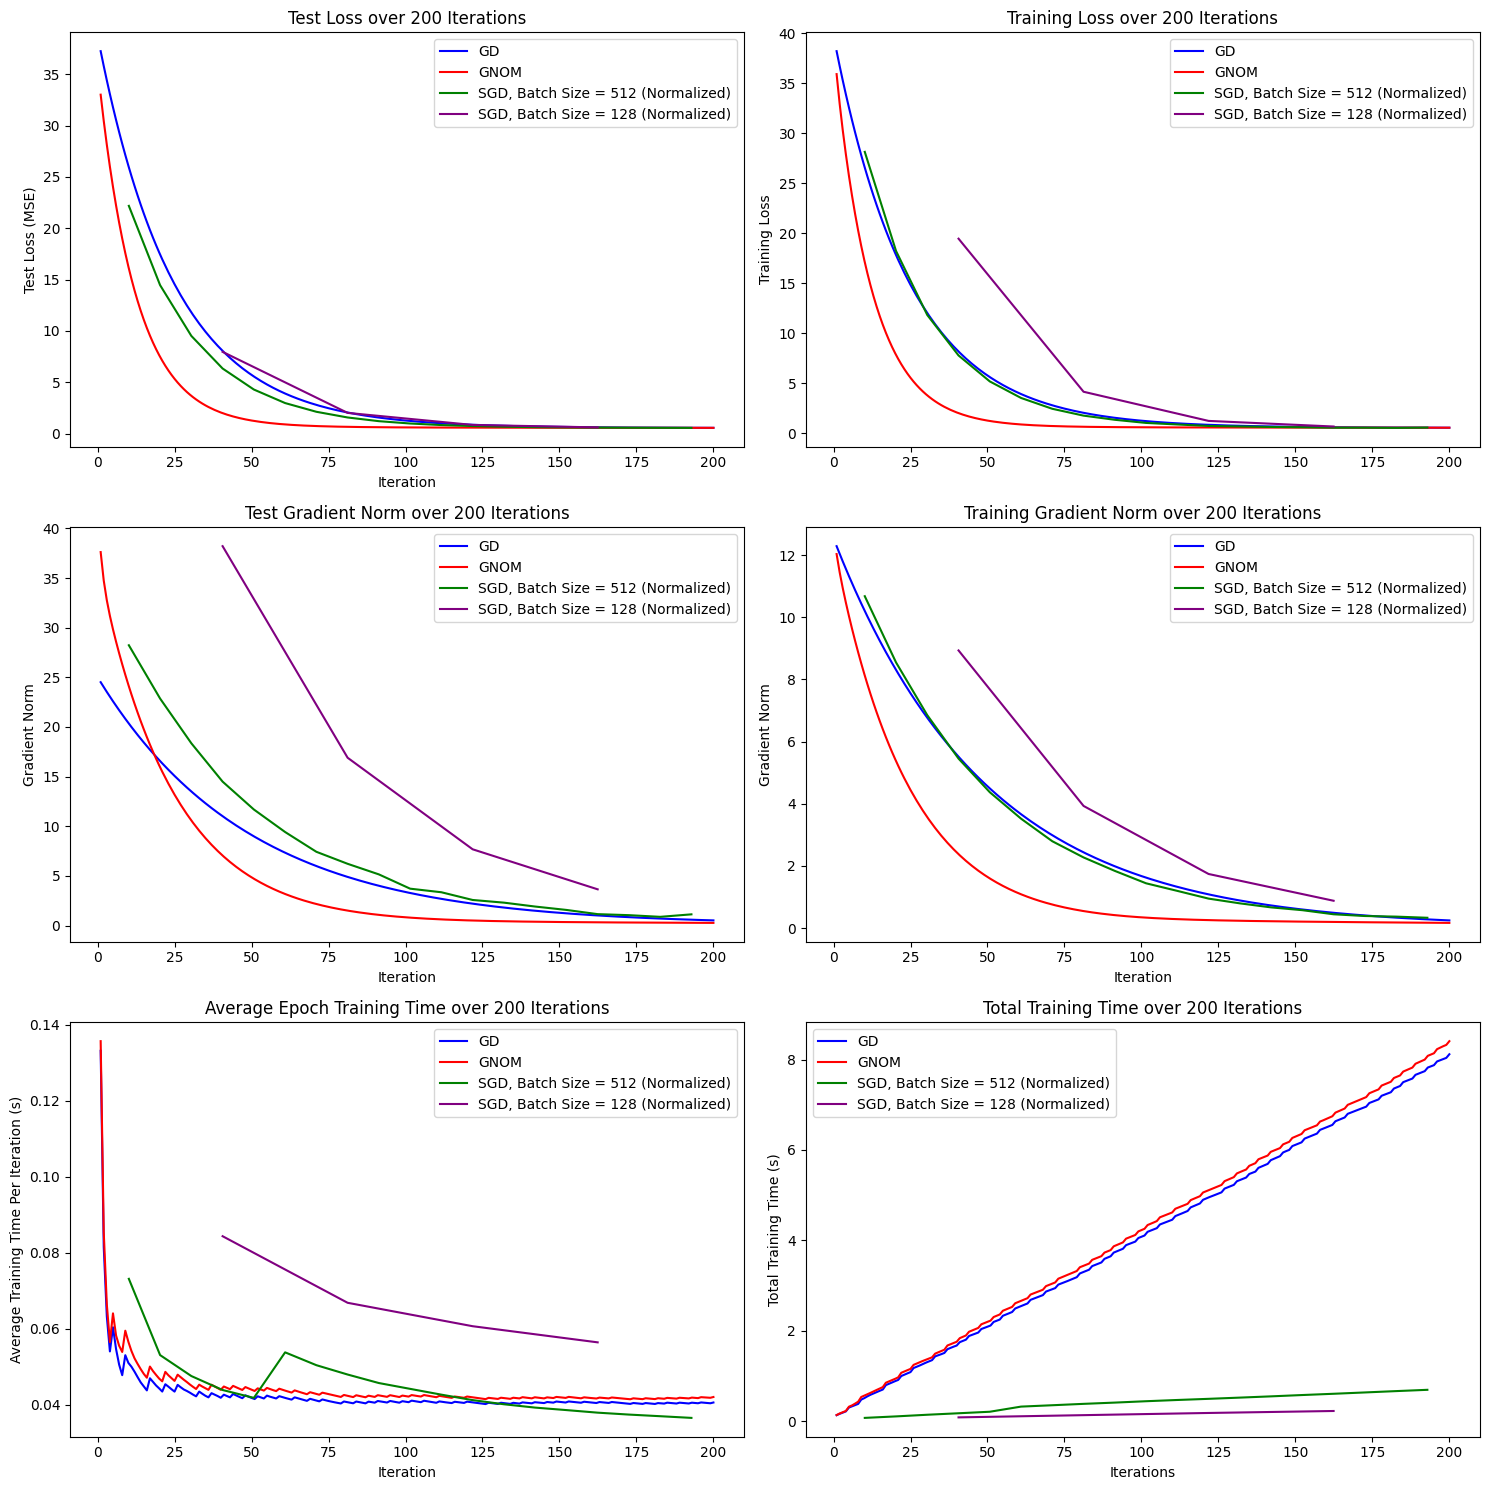

In [18]:
# Define ratio for normalization
ratio_512 = 5197 / 512
ratio_128 = 5197 / 128

# Normalize SGD_512
SGD_512_normalized = SGD_512.copy()  # Copy the original DataFrame
SGD_512_normalized['Epoch'] = SGD_512_normalized['Epoch'] * ratio_512
SGD_512_normalized = SGD_512_normalized[SGD_512_normalized['Epoch'] <= 200]

# Normalize SGD_128
SGD_128_normalized = SGD_128.copy()  # Copy the original DataFrame
SGD_128_normalized['Epoch'] = SGD_128_normalized['Epoch'] * ratio_128
SGD_128_normalized = SGD_128_normalized[SGD_128_normalized['Epoch'] <= 200]

# Extract test loss, training loss, norms, and training times for the normalized data
SGD_512_normalized_test_loss = SGD_512_normalized['Test Loss']
SGD_512_normalized_training_loss = SGD_512_normalized['Training Loss']
SGD_512_normalized_train_norm = SGD_512_normalized['Training Gradient Norm']
SGD_512_normalized_test_norm = SGD_512_normalized['Test Gradient Norm']
SGD_512_normalized_avg_training_time = SGD_512_normalized['Training Time (s)'].expanding().mean()
SGD_512_normalized_total_training_time = SGD_512_normalized['Training Time (s)'].expanding().sum()

SGD_128_normalized_test_loss = SGD_128_normalized['Test Loss']
SGD_128_normalized_training_loss = SGD_128_normalized['Training Loss']
SGD_128_normalized_train_norm = SGD_128_normalized['Training Gradient Norm']
SGD_128_normalized_test_norm = SGD_128_normalized['Test Gradient Norm']
SGD_128_normalized_avg_training_time = SGD_128_normalized['Training Time (s)'].expanding().mean()
SGD_128_normalized_total_training_time = SGD_128_normalized['Training Time (s)'].expanding().sum()

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Test Loss
axes[0, 0].plot(epochs, GD_test_loss, label='GD', color='blue')
axes[0, 0].plot(epochs, GNOM_test_loss, label='GNOM', color='red')
axes[0, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_test_loss, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Test Loss (MSE)')
axes[0, 0].set_title(f'Test Loss over {num_epochs} Iterations')
axes[0, 0].legend()

# Plot 2: Training Loss
axes[0, 1].plot(epochs, GD_training_loss, label='GD', color='blue')
axes[0, 1].plot(epochs, GNOM_training_loss, label='GNOM', color='red')
axes[0, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_training_loss, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[0, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_training_loss, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title(f'Training Loss over {num_epochs} Iterations')
axes[0, 1].legend()

# Plot 3: Training Gradient Norm
axes[1, 1].plot(epochs, GD_train_norm, label='GD', color='blue')
axes[1, 1].plot(epochs, GNOM_train_norm, label='GNOM', color='red')
axes[1, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_train_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_train_norm, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Gradient Norm')
axes[1, 1].set_title(f'Training Gradient Norm over {num_epochs} Iterations')
axes[1, 1].legend()

# Plot 4: Test Gradient Norm
axes[1, 0].plot(epochs, GD_test_norm, label='GD', color='blue')
axes[1, 0].plot(epochs, GNOM_test_norm, label='GNOM', color='red')
axes[1, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_test_norm, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[1, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_test_norm, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Gradient Norm')
axes[1, 0].set_title(f'Test Gradient Norm over {num_epochs} Iterations')
axes[1, 0].legend()

# Plot 5: Average Training Time
axes[2, 0].plot(epochs, GD_avg_training_time, label='GD', color='blue')
axes[2, 0].plot(epochs, GNOM_avg_training_time, label='GNOM', color='red')
axes[2, 0].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_avg_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 0].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_avg_training_time, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[2, 0].set_xlabel('Iteration')
axes[2, 0].set_ylabel('Average Training Time Per Iteration (s)')
axes[2, 0].set_title(f'Average Epoch Training Time over {num_epochs} Iterations')
axes[2, 0].legend()

# Plot 6: Total Training Time
axes[2, 1].plot(epochs, GD_total_training_time, label='GD', color='blue')
axes[2, 1].plot(epochs, GNOM_total_training_time, label='GNOM', color='red')
axes[2, 1].plot(SGD_512_normalized['Epoch'], SGD_512_normalized_total_training_time, label='SGD, Batch Size = 512 (Normalized)', color='green')
axes[2, 1].plot(SGD_128_normalized['Epoch'], SGD_128_normalized_total_training_time, label='SGD, Batch Size = 128 (Normalized)', color='purple')
axes[2, 1].set_xlabel('Iterations')
axes[2, 1].set_ylabel('Total Training Time (s)')
axes[2, 1].set_title(f'Total Training Time over {num_epochs} Iterations')
axes[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
